# Task
Develop an AI-based system to analyze product ingredient safety. This system should involve loading and preprocessing the "ingredient_effects.csv" dataset, performing NLP-based feature engineering using TF-IDF, training and evaluating a RandomForestRegressor model to predict 'Harm_Score', predicting harm scores for new ingredient descriptions, implementing a product risk logic to calculate an overall safety score for a sample product, and generating a comprehensive output with the final product safety classification (Safe, Moderate Risk, or Harmful) along with a color-coded result and a bar chart visualization.

## Load and Preprocess Dataset

### Subtask:
Load the 'ingredient_effects.csv' dataset. Perform initial data cleaning by checking for missing values and dropping duplicate rows. Rename 'Harmfulness_Score' to 'Harm_Score' for consistency and convert 'Effect_On_Human_Body' text to lowercase.


**Reasoning**:
The first step is to load the dataset 'ingredient_effects.csv' into a pandas DataFrame, check for missing values, drop duplicates, rename a column, and convert text to lowercase as per the instructions.



In [1]:
import pandas as pd

# 1. Load the dataset
df_ingredients = pd.read_csv('ingredient_effects.csv')

# 2. Check for missing values
print("Missing values before cleaning:")
print(df_ingredients.isnull().sum())

# 3. Drop duplicate rows and reset index
initial_rows = len(df_ingredients)
df_ingredients.drop_duplicates(inplace=True)
df_ingredients.reset_index(drop=True, inplace=True)
duplicated_rows_dropped = initial_rows - len(df_ingredients)
print(f"\nDropped {duplicated_rows_dropped} duplicate rows.")

# 4. Rename 'Harmfulness_Score' to 'Harm_Score'
df_ingredients.rename(columns={'Harmfulness_Score': 'Harm_Score'}, inplace=True)

# 5. Convert 'Effect_On_Human_Body' to lowercase
df_ingredients['Effect_On_Human_Body'] = df_ingredients['Effect_On_Human_Body'].str.lower()

print("\nDataFrame after cleaning and renaming:")
print(df_ingredients.head())

Missing values before cleaning:
Ingredient_Name         0
Harmfulness_Score       0
Effect_On_Human_Body    0
dtype: int64

Dropped 57 duplicate rows.

DataFrame after cleaning and renaming:
    Ingredient_Name  Harm_Score  \
0             Water           1   
1          Glycerin           1   
2       Xanthan Gum           1   
3          Carbomer           1   
4  Sodium Gluconate           1   

                                Effect_On_Human_Body  
0  safe solvent used as a base for dissolving oth...  
1  hydrates skin and helps maintain moisture balance  
2         natural thickener; non-toxic and skin-safe  
3   thickening agent; generally safe for topical use  
4    chelating agent that improves product stability  


## Feature Engineering with NLP

### Subtask:
Convert the 'Effect_On_Human_Body' text descriptions into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This will create a feature matrix suitable for machine learning models.


**Reasoning**:
The current subtask requires converting text descriptions into numerical features using TF-IDF. This step will import the necessary `TfidfVectorizer`, apply it to the `Effect_On_Human_Body` column, and store the resulting feature matrix.



In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to avoid very high dimensionality

# 2. Apply TF-IDF vectorizer to 'Effect_On_Human_Body' column
X = tfidf_vectorizer.fit_transform(df_ingredients['Effect_On_Human_Body'])

# 3. Print the shape of the resulting feature matrix
print(f"Shape of TF-IDF feature matrix X: {X.shape}")

Shape of TF-IDF feature matrix X: (372, 434)


### Predict Harm Score for a User-Provided Ingredient Description

Below is an example of how you can provide a new ingredient description and get a predicted harm score from the trained model.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Separate the target variable 'Harm_Score'
y = df_ingredients['Harm_Score']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

print("Model training complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Model training complete.
X_train shape: (297, 434)
X_test shape: (75, 434)
y_train shape: (297,)
y_test shape: (75,)


## Load and Preprocess Dataset

### Subtask:
Load the 'ingredient_effects.csv' dataset. Perform initial data cleaning by checking for missing values and dropping duplicate rows. Rename 'Harmfulness_Score' to 'Harm_Score' for consistency and convert 'Effect_On_Human_Body' text to lowercase.

In [4]:
import pandas as pd

# 1. Load the dataset
df_ingredients = pd.read_csv('ingredient_effects.csv')

# 2. Check for missing values
print("Missing values before cleaning:")
print(df_ingredients.isnull().sum())

# 3. Drop duplicate rows and reset index
initial_rows = len(df_ingredients)
df_ingredients.drop_duplicates(inplace=True)
df_ingredients.reset_index(drop=True, inplace=True)
duplicated_rows_dropped = initial_rows - len(df_ingredients)
print(f"\nDropped {duplicated_rows_dropped} duplicate rows.")

# 4. Rename 'Harmfulness_Score' to 'Harm_Score'
df_ingredients.rename(columns={'Harmfulness_Score': 'Harm_Score'}, inplace=True)

# 5. Convert 'Effect_On_Human_Body' to lowercase
df_ingredients['Effect_On_Human_Body'] = df_ingredients['Effect_On_Human_Body'].str.lower()

print("\nDataFrame after cleaning and renaming:")
print(df_ingredients.head())

Missing values before cleaning:
Ingredient_Name         0
Harmfulness_Score       0
Effect_On_Human_Body    0
dtype: int64

Dropped 57 duplicate rows.

DataFrame after cleaning and renaming:
    Ingredient_Name  Harm_Score  \
0             Water           1   
1          Glycerin           1   
2       Xanthan Gum           1   
3          Carbomer           1   
4  Sodium Gluconate           1   

                                Effect_On_Human_Body  
0  safe solvent used as a base for dissolving oth...  
1  hydrates skin and helps maintain moisture balance  
2         natural thickener; non-toxic and skin-safe  
3   thickening agent; generally safe for topical use  
4    chelating agent that improves product stability  


## Feature Engineering with NLP

### Subtask:
Convert the 'Effect_On_Human_Body' text descriptions into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This will create a feature matrix suitable for machine learning models.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to avoid very high dimensionality

# 2. Apply TF-IDF vectorizer to 'Effect_On_Human_Body' column
X = tfidf_vectorizer.fit_transform(df_ingredients['Effect_On_Human_Body'])

# 3. Print the shape of the resulting feature matrix
print(f"Shape of TF-IDF feature matrix X: {X.shape}")

Shape of TF-IDF feature matrix X: (372, 434)


## Train Supervised Learning Model

### Subtask:
Split the preprocessed data into training and testing sets. Train a RandomForestRegressor model to predict the 'Harm_Score' based on the generated TF-IDF features.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Separate the target variable 'Harm_Score'
y = df_ingredients['Harm_Score']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

print("Model training complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Model training complete.
X_train shape: (297, 434)
X_test shape: (75, 434)
y_train shape: (297,)
y_test shape: (75,)


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance by calculating the Mean Squared Error (MSE) on the test set. Visualize the predicted versus actual harm scores using a scatter plot to assess prediction accuracy.

Mean Squared Error (MSE): 1.4307


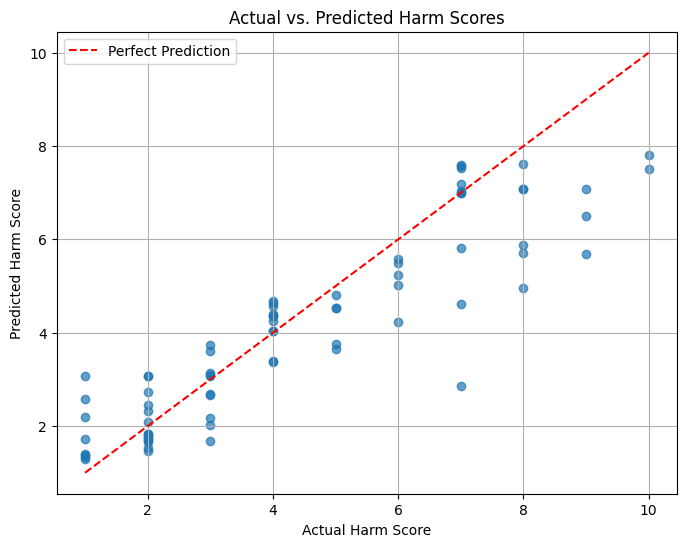

In [7]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Predict 'Harm_Score' for the test set
y_pred = model.predict(X_test)

# 2. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 3. Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# 4. Add title
plt.title('Actual vs. Predicted Harm Scores')

# 5. Label axes
plt.xlabel('Actual Harm Score')
plt.ylabel('Predicted Harm Score')

# 6. Add a diagonal line for perfect predictions
# Determine the range for the diagonal line
min_score = min(y_test.min(), y_pred.min())
max_score = max(y_test.max(), y_pred.max())
plt.plot([min_score, max_score], [min_score, max_score], 'r--', label='Perfect Prediction')

plt.legend()
plt.grid(True)

# 7. Display the plot
plt.show()

Enter a new ingredient effect description: REFINED WHEAT FLOUR (53%), EDIBLE VEGETABLE OIL (PALM), MALTITOL (965), INULIN, ROLLED OATS (6%), MILK SOLIDS, NATURAL CEREAL FIBRE (OATS-3%), ALMOND (33%), MALTODEX-TRIN, RAISING AGENTS [503(ii),500(ii), 450(i)], EDIBLE COMMON SALT, EMULSIFIERS (322,412,472,471), DOUGH CONDITIONER (223) AND SWEETENER (955).

User Input Ingredient Description: 'refined wheat flour (53%), edible vegetable oil (palm), maltitol (965), inulin, rolled oats (6%), milk solids, natural cereal fibre (oats-3%), almond (33%), maltodex-trin, raising agents [503(ii),500(ii), 450(i)], edible common salt, emulsifiers (322,412,472,471), dough conditioner (223) and sweetener (955).'
Predicted Harm Score: 4.31
Generated Effect on Human Body: May cause moderate irritation or sensitivity in some individuals.
Safety Classification: Moderate Risk


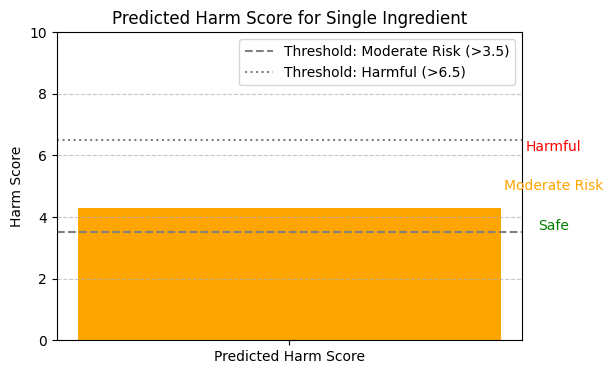

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Get user input for a new ingredient effect description
user_ingredient_effect = input("Enter a new ingredient effect description: ")

# 2. Convert the user input to lowercase for consistency
user_ingredient_effect = user_ingredient_effect.lower()

# Flag to track if a NameError occurred
name_error_occurred = False

try:
    # 3. Transform the user's input using the trained TF-IDF vectorizer
    user_input_X = tfidf_vectorizer.transform([user_ingredient_effect])

    # Check if the transformed input contains any recognized terms
    if user_input_X.sum() == 0:
        print(f"\nUser Input Ingredient Description: '{user_ingredient_effect}'")
        print("No recognized terms found in the input. Please provide a more descriptive effect.")
        predicted_score_single = np.nan
        effect_description_single = 'Input too ambiguous for meaningful prediction.'
        user_safety_classification = 'Ambiguous Input'
        color_code_single = 'gray'
    else:
        # 4. Predict the 'Harm_Score' for the user's input
        predicted_user_harm_score = model.predict(user_input_X)

        # 5. Extract the predicted score for easier use
        predicted_score_single = predicted_user_harm_score[0]

        # 6. Generate an Effect_On_Human_Body description based on the predicted harm score
        if predicted_score_single <= 3.5:
            effect_description_single = 'Generally safe with minimal known side effects.'
        elif 3.5 < predicted_score_single <= 6.5:
            effect_description_single = 'May cause moderate irritation or sensitivity in some individuals.'
        else:
            effect_description_single = 'Associated with high risk and potential adverse health effects.'

        # 7. Classify the user's ingredient effect based on predicted harm score
        if predicted_score_single <= 3.5:
            user_safety_classification = 'Safe'
            color_code_single = 'green'
        elif 3.5 < predicted_score_single <= 6.5:
            user_safety_classification = 'Moderate Risk'
            color_code_single = 'orange'
        else:
            user_safety_classification = 'Harmful'
            color_code_single = 'red'

        # 8. Print the results
        print(f"\nUser Input Ingredient Description: '{user_ingredient_effect}'")
        print(f"Predicted Harm Score: {predicted_score_single:.2f}")
        print(f"Generated Effect on Human Body: {effect_description_single}")
        print(f"Safety Classification: \033[1;3{(lambda c: {'green': 2, 'orange': 3, 'red': 1}.get(c, 0))(color_code_single)}m{user_safety_classification}\033[0m")

except NameError as e:
    print(f"Error: {e}. It appears that the 'tfidf_vectorizer' or 'model' object is not defined.")
    print("Please ensure you have run the following cells in order:")
    print("1. The cell for 'Load and Preprocess Dataset' (e.g., cell id 5219e519).")
    print("2. The cell(s) for 'Feature Engineering with NLP' (e.g., cell id 2528ff69 or 61215070).")
    print("3. The cell(s) for 'Train Supervised Learning Model' (e.g., cell id 61f1e7eb or 2a297de1).")
    predicted_score_single = np.nan # Set to NaN so visualization is skipped
    name_error_occurred = True

# 9. Create a bar chart visualization only if a valid prediction was made
if not np.isnan(predicted_score_single):
    plt.figure(figsize=(6, 4))
    plt.bar(['Predicted Harm Score'], [predicted_score_single], color=color_code_single)
    plt.title('Predicted Harm Score for Single Ingredient')
    plt.ylabel('Harm Score')
    plt.ylim(0, 10) # Assuming harm scores are typically 0-10

    # Add horizontal lines for classification thresholds
    plt.axhline(y=3.5, color='gray', linestyle='--', label='Threshold: Moderate Risk (>3.5)')
    plt.axhline(y=6.5, color='gray', linestyle=':', label='Threshold: Harmful (>6.5)')

    plt.text(0.5, 3.5, 'Safe', va='bottom', ha='center', color='green')
    plt.text(0.5, 5, 'Moderate Risk', va='center', ha='center', color='orange')
    plt.text(0.5, 6.5, 'Harmful', va='top', ha='center', color='red')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
elif name_error_occurred:
    # Message already printed in the except block, so do nothing here.
    pass
else:
    print("Visualization skipped due to ambiguous input.")

# Task
Perform a comprehensive product safety analysis for a sample product. This involves defining the product's ingredients, predicting their individual 'Harm_Score' using the trained model, generating or retrieving their 'Effect_On_Human_Body' descriptions from `df_ingredients`, calculating overall product safety metrics (Average_Score, Maximum_Score, Final_Score), classifying the product's safety (Safe, Moderate Risk, or Harmful) with a color-coded result, visualizing individual ingredient harm scores in a bar chart, and providing a summary of the analysis.

In [9]:
 end

NameError: name 'end' is not defined

## Analyze Feature Importances

### Subtask:
Extract feature importances from the trained `RandomForestRegressor` model, map them to their corresponding TF-IDF terms, and visualize the top N most important features to understand which textual elements contribute most to harm score prediction.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for better handling and sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Visualize the top 10 most important features
plt.figure(figsize=(12, 7))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Harm Score Prediction')
plt.gca().invert_yaxis() # Display highest importance at the top
plt.tight_layout()
plt.show()